In [ ]:
import pandas as pd
import numpy as np
import ser
import lib_tree
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([ 2.0, 3.0,4.0])].index, 'labels']=1.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)

In [ ]:
train= pd.read_csv("train_data.csv")
test= pd.read_csv("test_data.csv")
train.loc[train[train.labels.isin([ 2.0])].index, 'labels']=1.0
test.loc[test[test.labels.isin([ 2.0])].index, 'labels']=1.0
yt = train.labels
Xt= train.drop([ 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.9, stratify=yt,  random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()
y_test_t = test.labels
X_test_t = test.drop([ 'labels'], axis=1)

SER original

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(Xs, ys)
SER = copy.deepcopy(clf)
ser.SER(0,SER, X_train_t, y_train_t, original_ser=True)
print('ser original accuracy:', SER.score(X_test_t, y_test_t))
y_pred = SER.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('roc auc:', roc)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser original:")
print(cm)

ser original accuracy: 0.8913857677902621
Weighted F1 score:  0.8859347865125526
precision: [0.88679245 0.90909091]
recall; [0.97409326 0.67567568]
fscore: [0.92839506 0.7751938 ]
roc auc: 0.8248844699621901
support: [193  74]
Confusion Matrix ser original:
[[188   5]
 [ 24  50]]


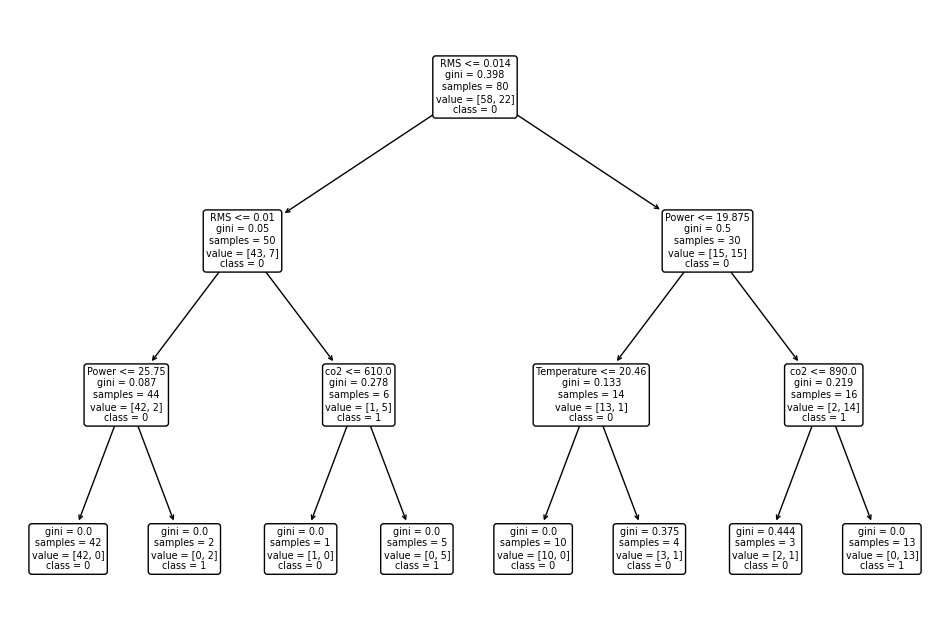

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()

SER IMB

In [ ]:
target_names = ['class 0', 'class 1']
cl_no_red = [1]
Nkmin = sum(y_train_t == cl_no_red)
root_source_values = lib_tree.get_node_distribution(clf, 0).reshape(-1)
props_s = root_source_values
props_s = props_s / sum(props_s)
props_t = np.zeros(props_s.size)
for k in range(props_s.size):
    props_t[k] = np.sum(y_train_t == k) / y_train_t.size
coeffs = np.divide(props_t, props_s)

In [ ]:
ser_imb = copy.deepcopy(clf)
ser.SER(0, ser_imb, X_train_t, y_train_t, original_ser=False, no_red_on_cl=True, cl_no_red=cl_no_red, no_ext_on_cl=True, cl_no_ext=cl_no_red, ext_cond=True, leaf_loss_quantify=True, leaf_loss_threshold=0.2, coeffs=coeffs, root_source_values=root_source_values, Nkmin=Nkmin)
print('ser* accuracy:', ser_imb.score(X_test_t, y_test_t))
y_pred = ser_imb.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc_auc = roc_auc_score (y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('Weighted F1 score: ', f1_weighted)
print('ROC AUC :', roc_auc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix:")
print(cm)
print('\n')
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
print("accuracy per class", accuracy_per_class)
macro_precision = precision_score(y_test_t, y_pred, average='macro')
micro_precision = precision_score(y_test_t, y_pred, average='micro')

# Calculate weighted average precision
weighted_precision = precision_score(y_test_t, y_pred, average='weighted')
print('macro precision:', macro_precision )

print('micro precision:', micro_precision )

print('weighted_precision:', weighted_precision )

print(classification_report(y_test_t, y_pred, target_names=target_names))

ser* accuracy: 0.8838951310861424
Weighted F1 score:  0.877291244096517
ROC AUC : 0.8113709564486767
precision: [0.87850467 0.90566038]
recall; [0.97409326 0.64864865]
fscore: [0.92383292 0.75590551]
support: [193  74]
Confusion Matrix:
[[188   5]
 [ 26  48]]


accuracy per class [0.97409326 0.64864865]
macro precision: 0.8920825251278435
micro precision: 0.8838951310861424
weighted_precision: 0.8860309730100643
              precision    recall  f1-score   support

     class 0       0.88      0.97      0.92       193
     class 1       0.91      0.65      0.76        74

    accuracy                           0.88       267
   macro avg       0.89      0.81      0.84       267
weighted avg       0.89      0.88      0.88       267



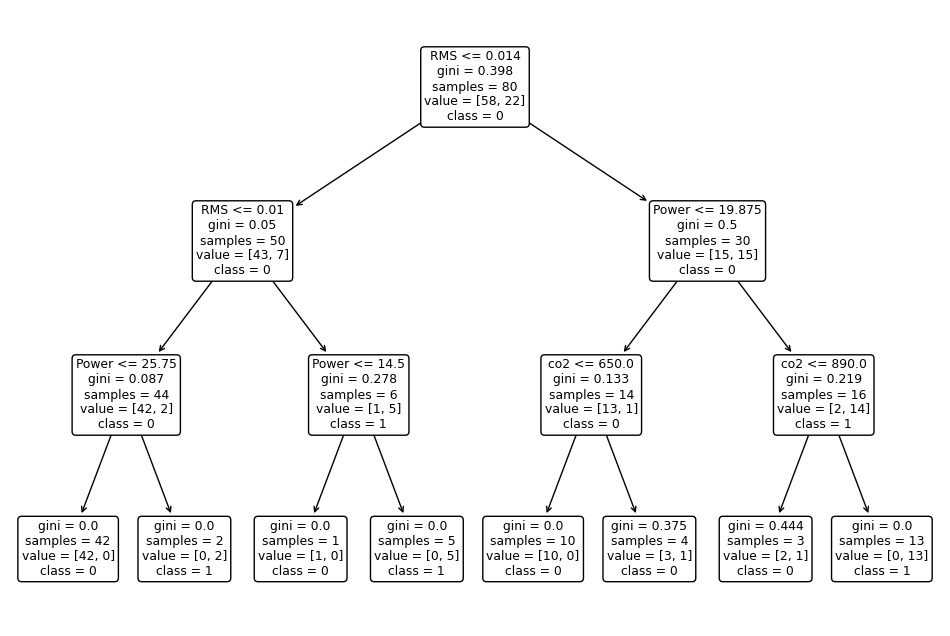

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(ser_imb, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()